In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset-Unicauca-Version2-87Atts.csv')
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [4]:
df.columns

Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64

#Preprocessing

#EDA

#### Boxplot

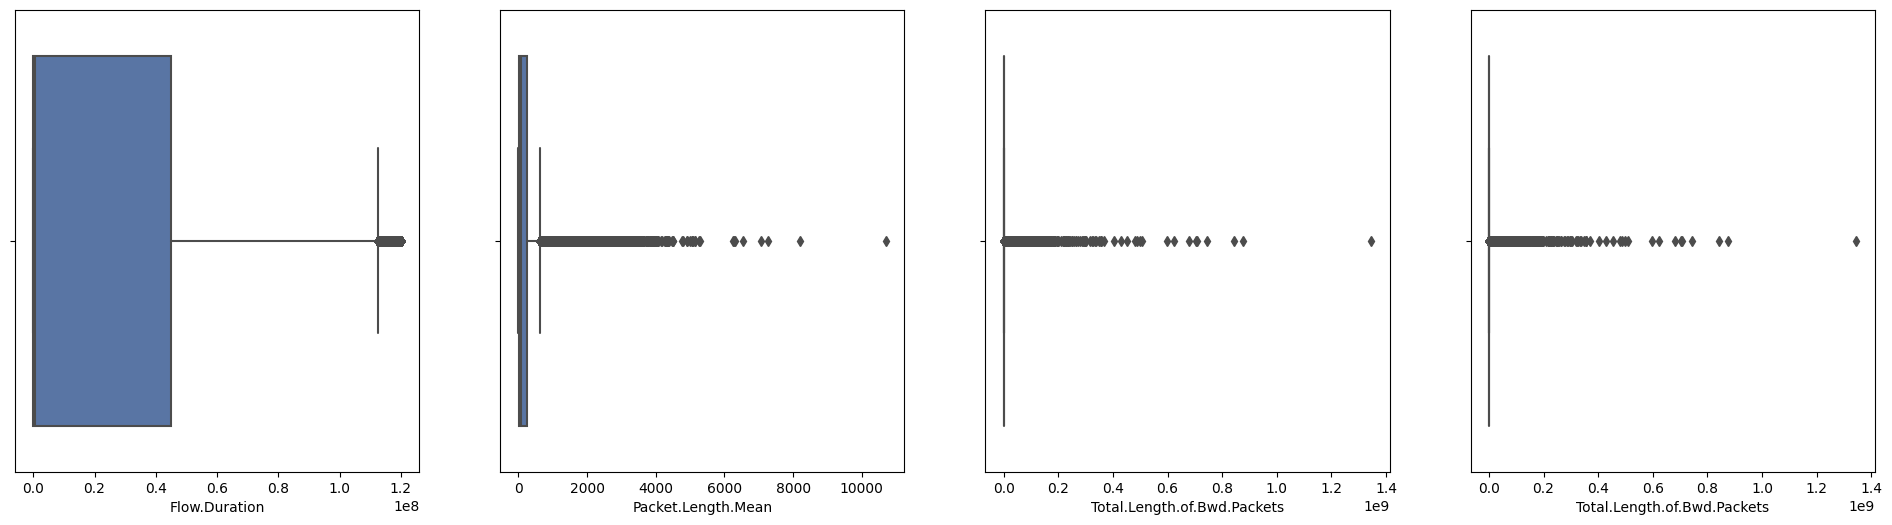

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Flow.Duration", "Packet.Length.Mean","Total.Length.of.Bwd.Packets","Total.Length.of.Bwd.Packets"]):
    sns.boxplot(x=df[col], ax=ax[axid])

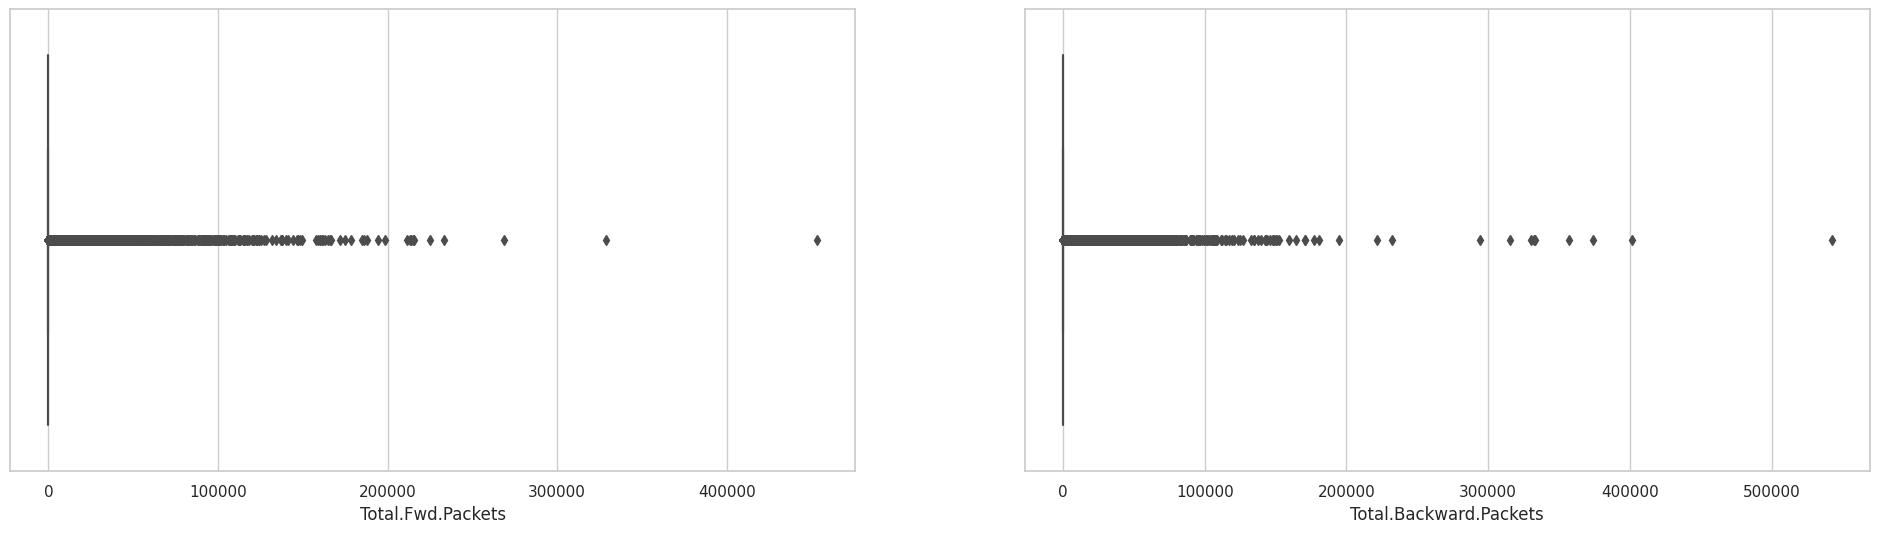

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total.Fwd.Packets", "Total.Backward.Packets"]):
    sns.boxplot(x=df[col], ax=ax[axid])

Correlation

In [7]:
selected_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName']
df = df.loc[:, selected_columns]
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Mean,...,Bwd.Packets.s,Min.Packet.Length,Packet.Length.Mean,Down.Up.Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,110414.0,6.000000,...,1208.180480,6,1417.333333,2,256,490,20,0.0,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0.0,6.000000,...,0.000000,6,6.000000,0,490,-1,20,0.0,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0.0,224.666667,...,0.000000,0,252.750000,0,888,-1,32,0.0,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,0.0,0.000000,...,13824.884793,0,0.000000,3,888,490,32,0.0,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0.0,215.200000,...,0.000000,6,267.500000,0,253,-1,20,0.0,131,HTTP_PROXY


In [8]:
print(df.shape)

(3577296, 26)


In [9]:
print(df.dtypes)

Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Min            int64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Min                     int64
Fwd.IAT.Min                    float64
Bwd.IAT.Min                    float64
Bwd.Packets.s                  float64
Min.Packet.Length                int64
Packet.Length.Mean             float64
Down.Up.Ratio                    int64
Init_Win_bytes_forward           int64
Init_Win_bytes_backward          int64
min_seg_size_forward             int64
Active.Mean                    float64
L7Protocol                       int64
ProtocolName             

In [10]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns for which you want to remove outliers
columns_to_check = [ 'Source.Port', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol']  # Replace with your column names

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_check)

# Now, df_cleaned contains your DataFrame with outliers removed.
df_cleaned.head()
print(df_cleaned.shape)

(285213, 26)


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['Source.IP','Destination.IP','ProtocolName']

# Perform label encoding for the specified columns
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [12]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Mean,...,Down.Up.Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName,Source.IP_encoded,Destination.IP_encoded,ProtocolName_encoded
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,110414.0,6.000000,...,2,256,490,20,0.0,131,HTTP_PROXY,1291,65,28
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0.0,6.000000,...,0,490,-1,20,0.0,131,HTTP_PROXY,62,5197,28
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0.0,224.666667,...,0,888,-1,32,0.0,7,HTTP,4697,59,25
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,0.0,0.000000,...,3,888,490,32,0.0,7,HTTP,4697,59,25
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0.0,215.200000,...,0,253,-1,20,0.0,131,HTTP_PROXY,3181,65,28


###Piechart

Distribution of ProtocolName && Protocoltype

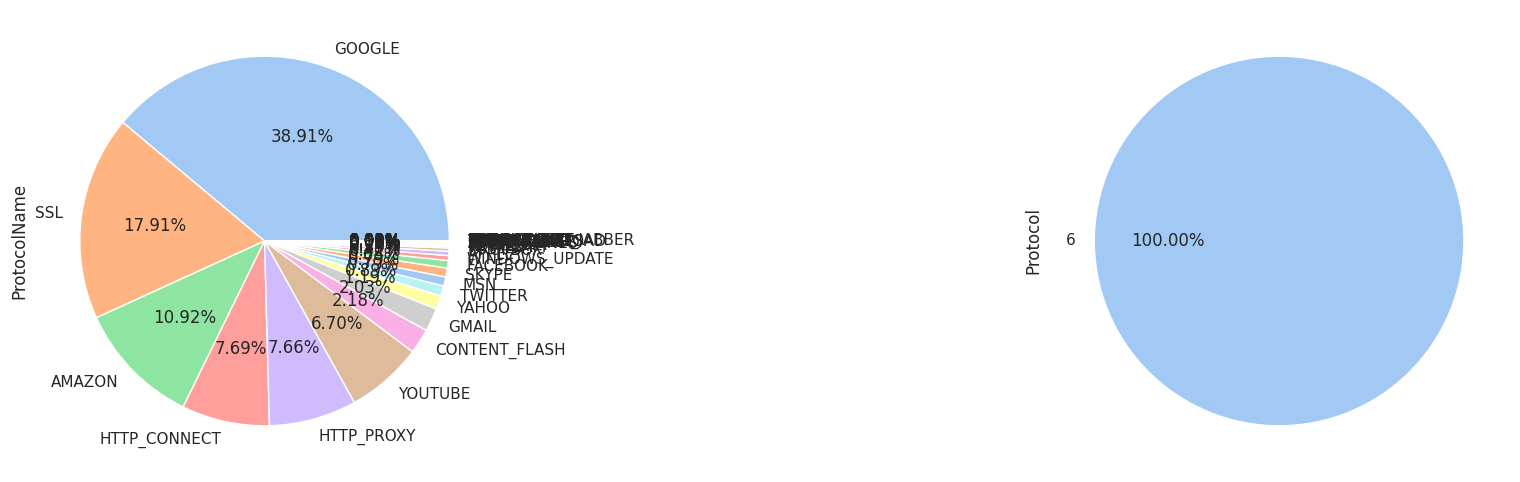

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["ProtocolName","Protocol"]):
    col_dist = df_cleaned[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

Distribution of L7 Protocol Names && Down/Up Ratio

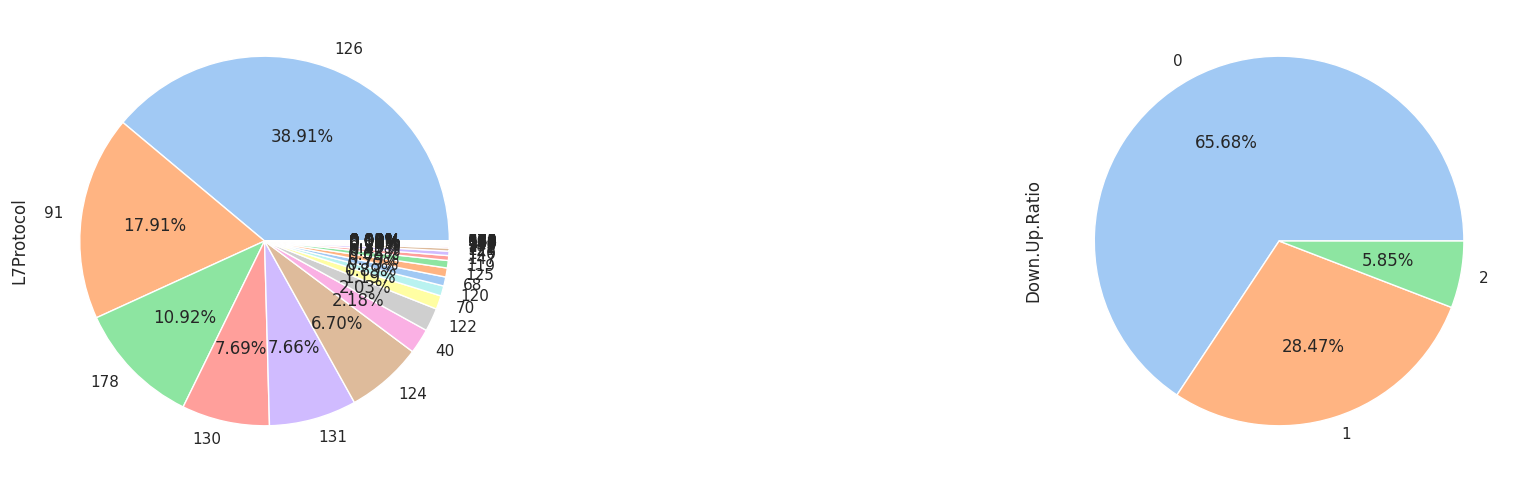

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["L7Protocol","Down.Up.Ratio"]):
    col_dist = df_cleaned[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

In [22]:
df_cnt_h=df_cleaned['Flow.Duration'].value_counts()
df_cnt_h

472         13
473         13
544         10
240267      10
240426      10
            ..
14113026     1
4900903      1
4925567      1
4925603      1
2055         1
Name: Flow.Duration, Length: 268705, dtype: int64

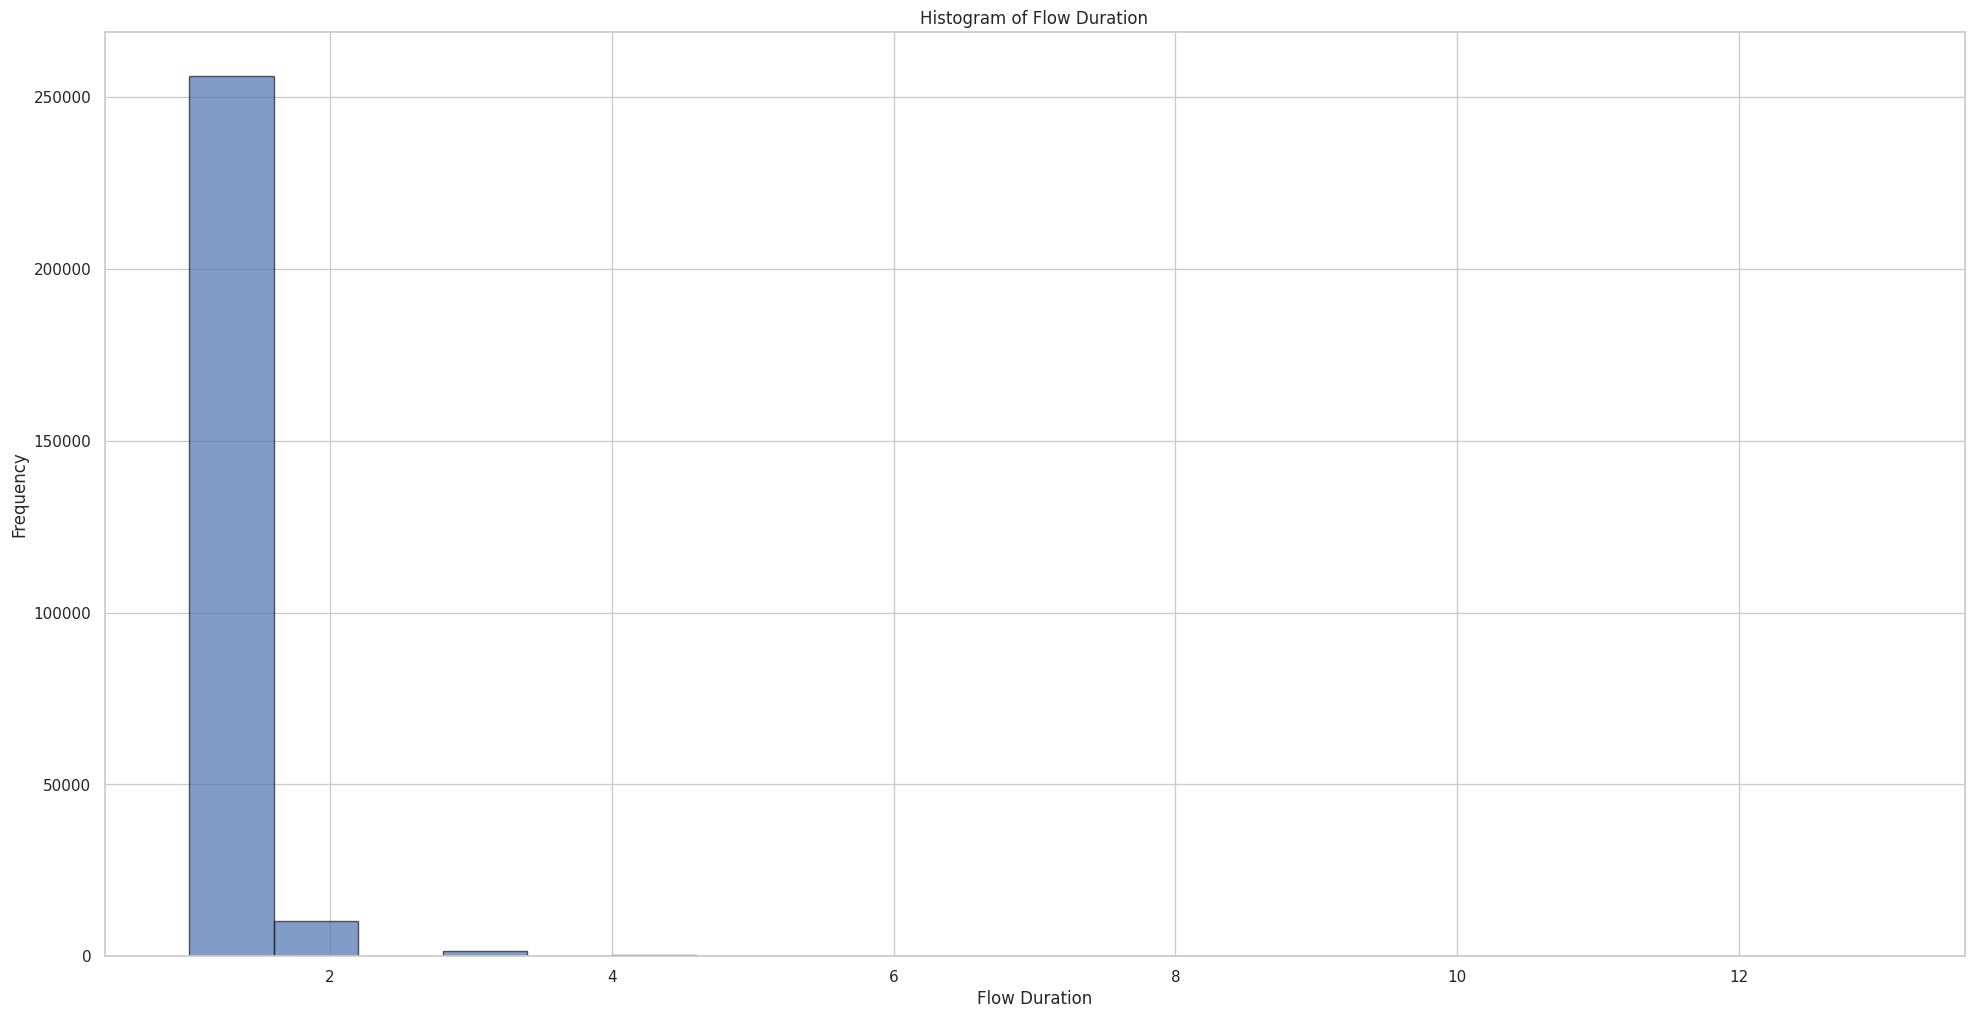

In [24]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

In [25]:
df_cnt_h=df_cleaned['Source.Port'].value_counts()
df_cnt_h

50474    40
51219    36
50510    36
50074    36
50850    36
         ..
4502      1
4446      1
4497      1
4567      1
65224     1
Name: Source.Port, Length: 33766, dtype: int64

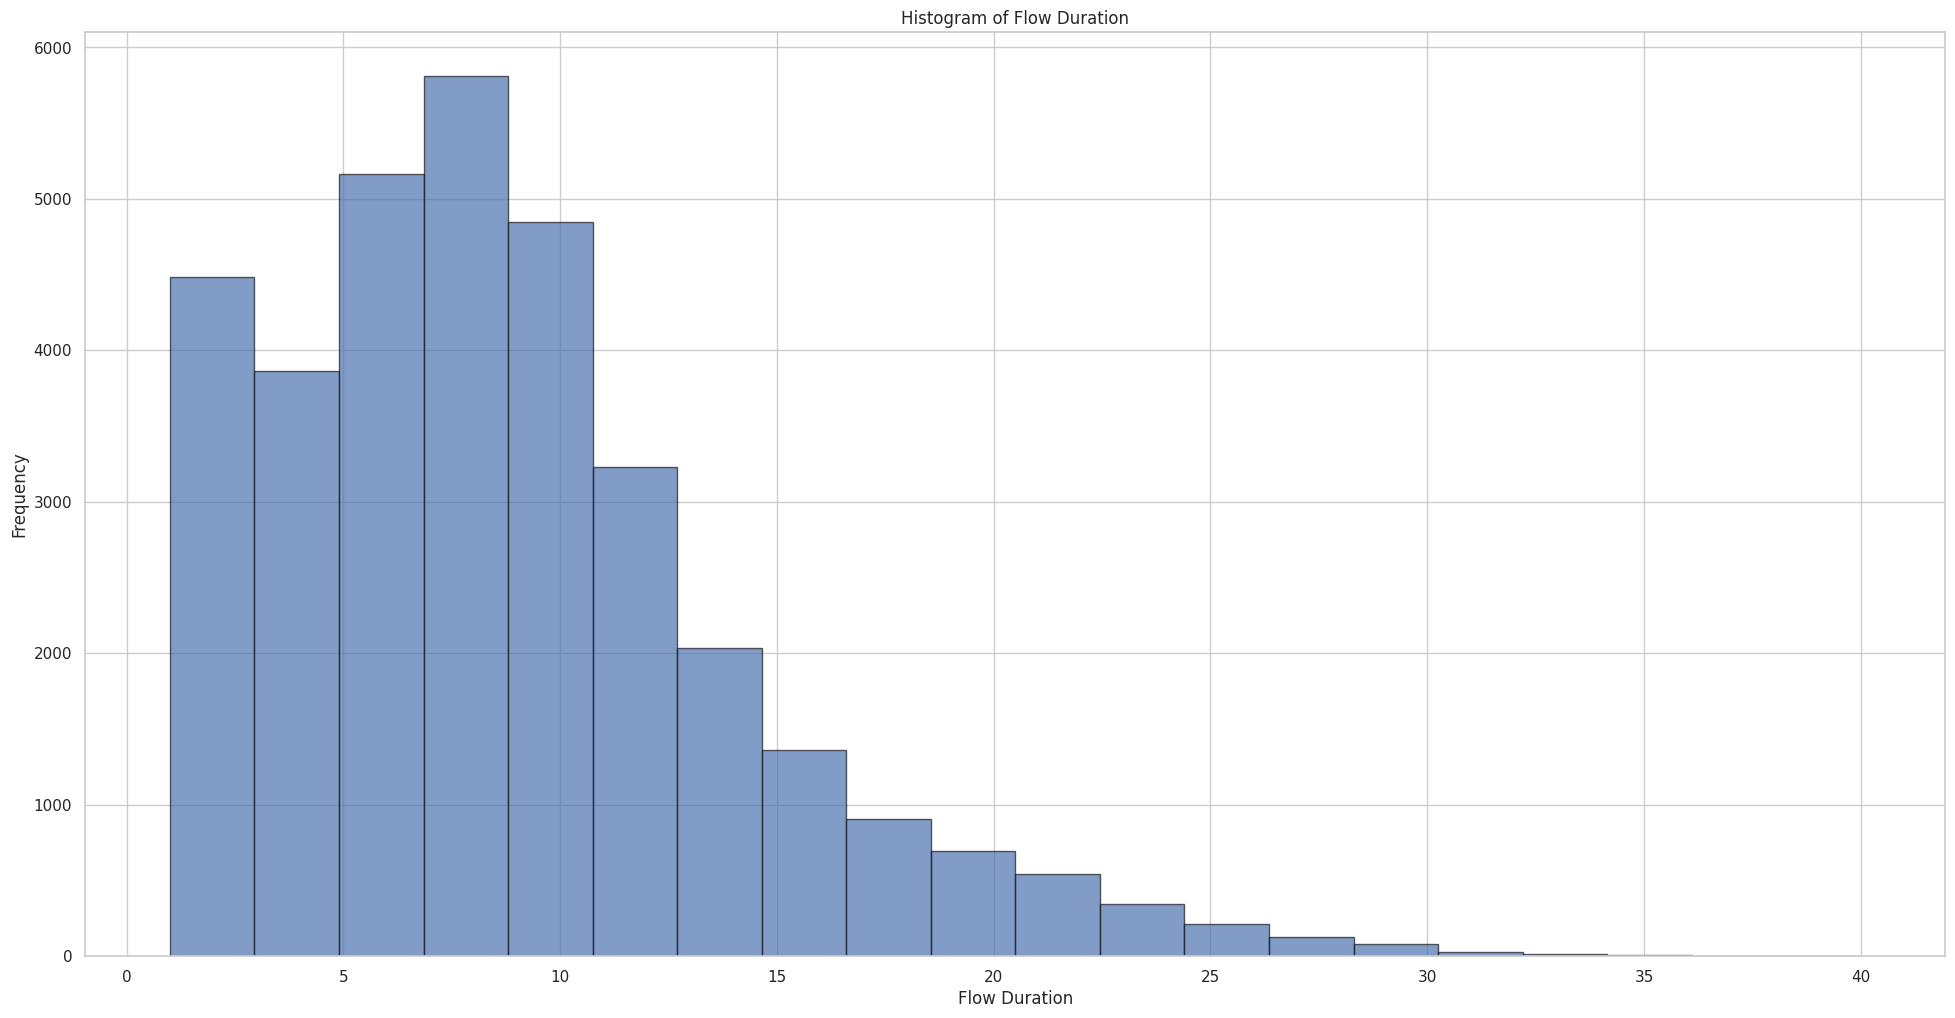

In [26]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.title('Histogram of Source port')
plt.show()

In [27]:
df_cnt_h=df_cleaned['Destination.Port'].value_counts()
df_cnt_h

443     156806
3128     86637
80       40446
5228      1013
5223       266
3250        11
22           7
2083         6
3000         5
5222         4
4433         2
1794         1
2004         1
1821         1
3001         1
1430         1
2048         1
4448         1
1722         1
2282         1
4140         1
Name: Destination.Port, dtype: int64

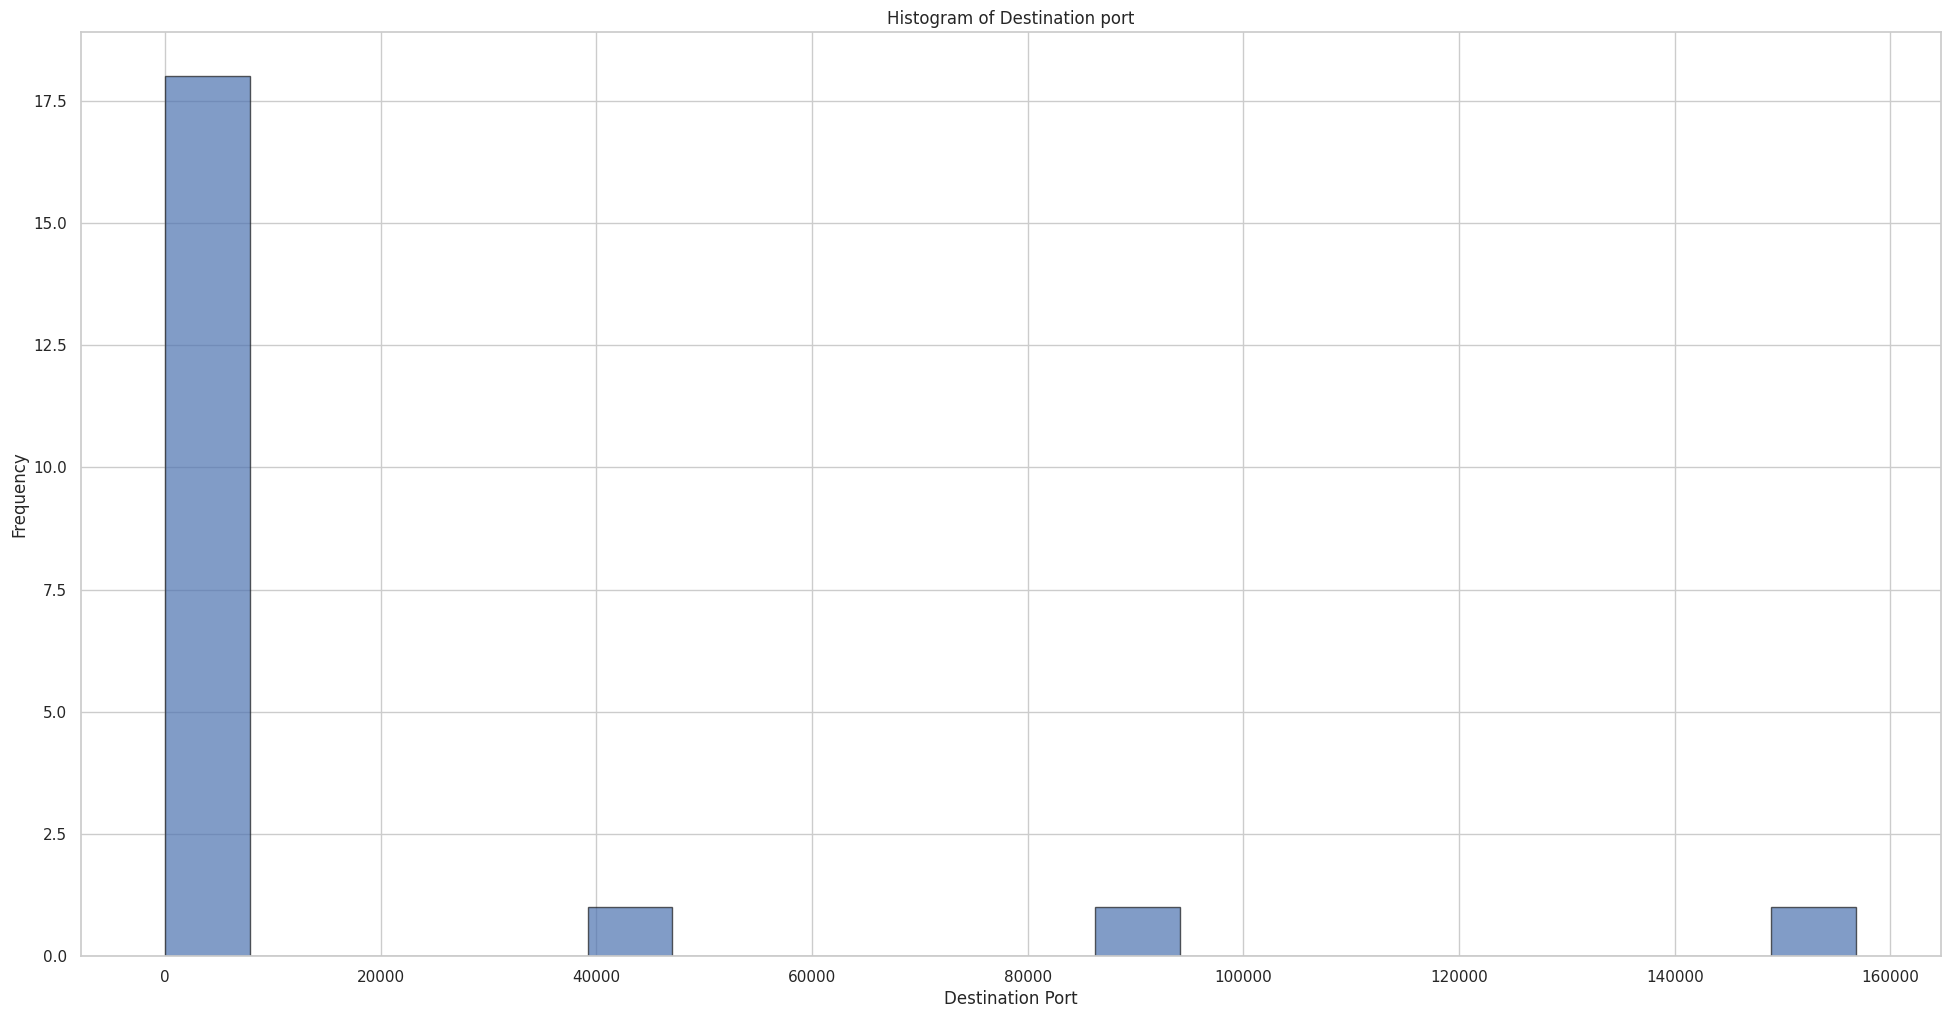

In [28]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.title('Histogram of Destination port')
plt.show()

###Scatterplot

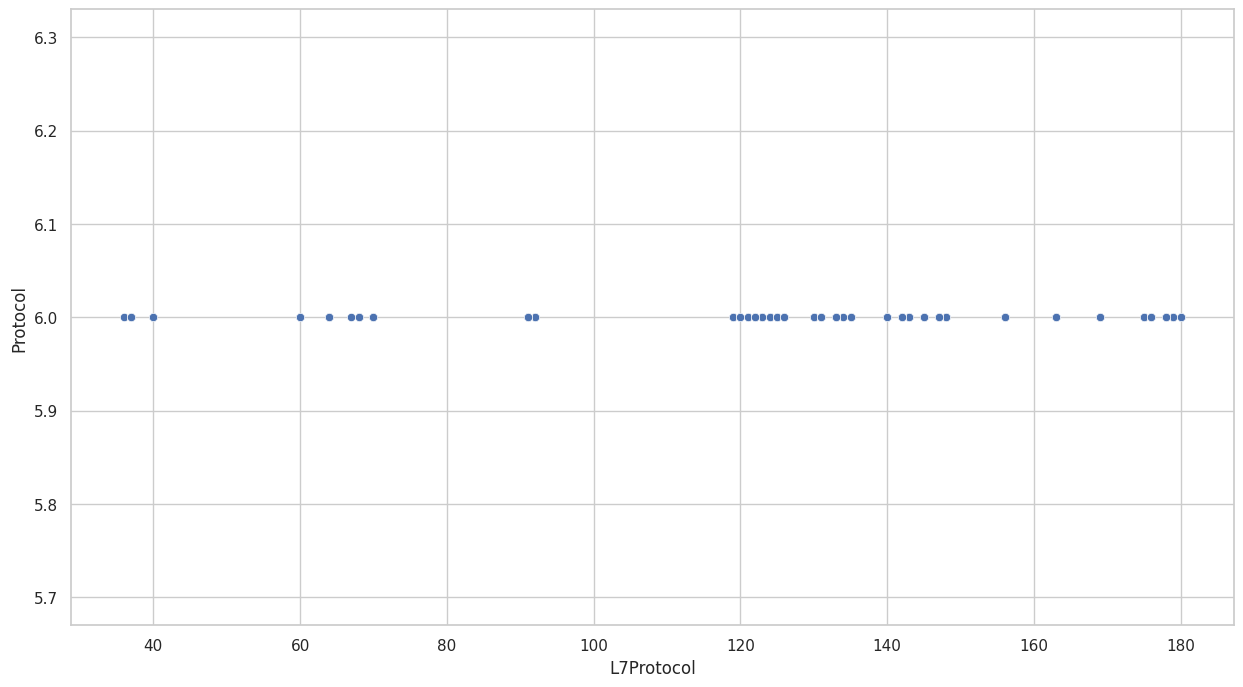

In [31]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df_cleaned["L7Protocol"], y=df_cleaned["Protocol"], sizes=(20, 200), legend="full")

###Correltion

<ipython-input-30-fd63b8ff5be5>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=new_df.corr(), lw = 1,annot=True)


<Axes: >

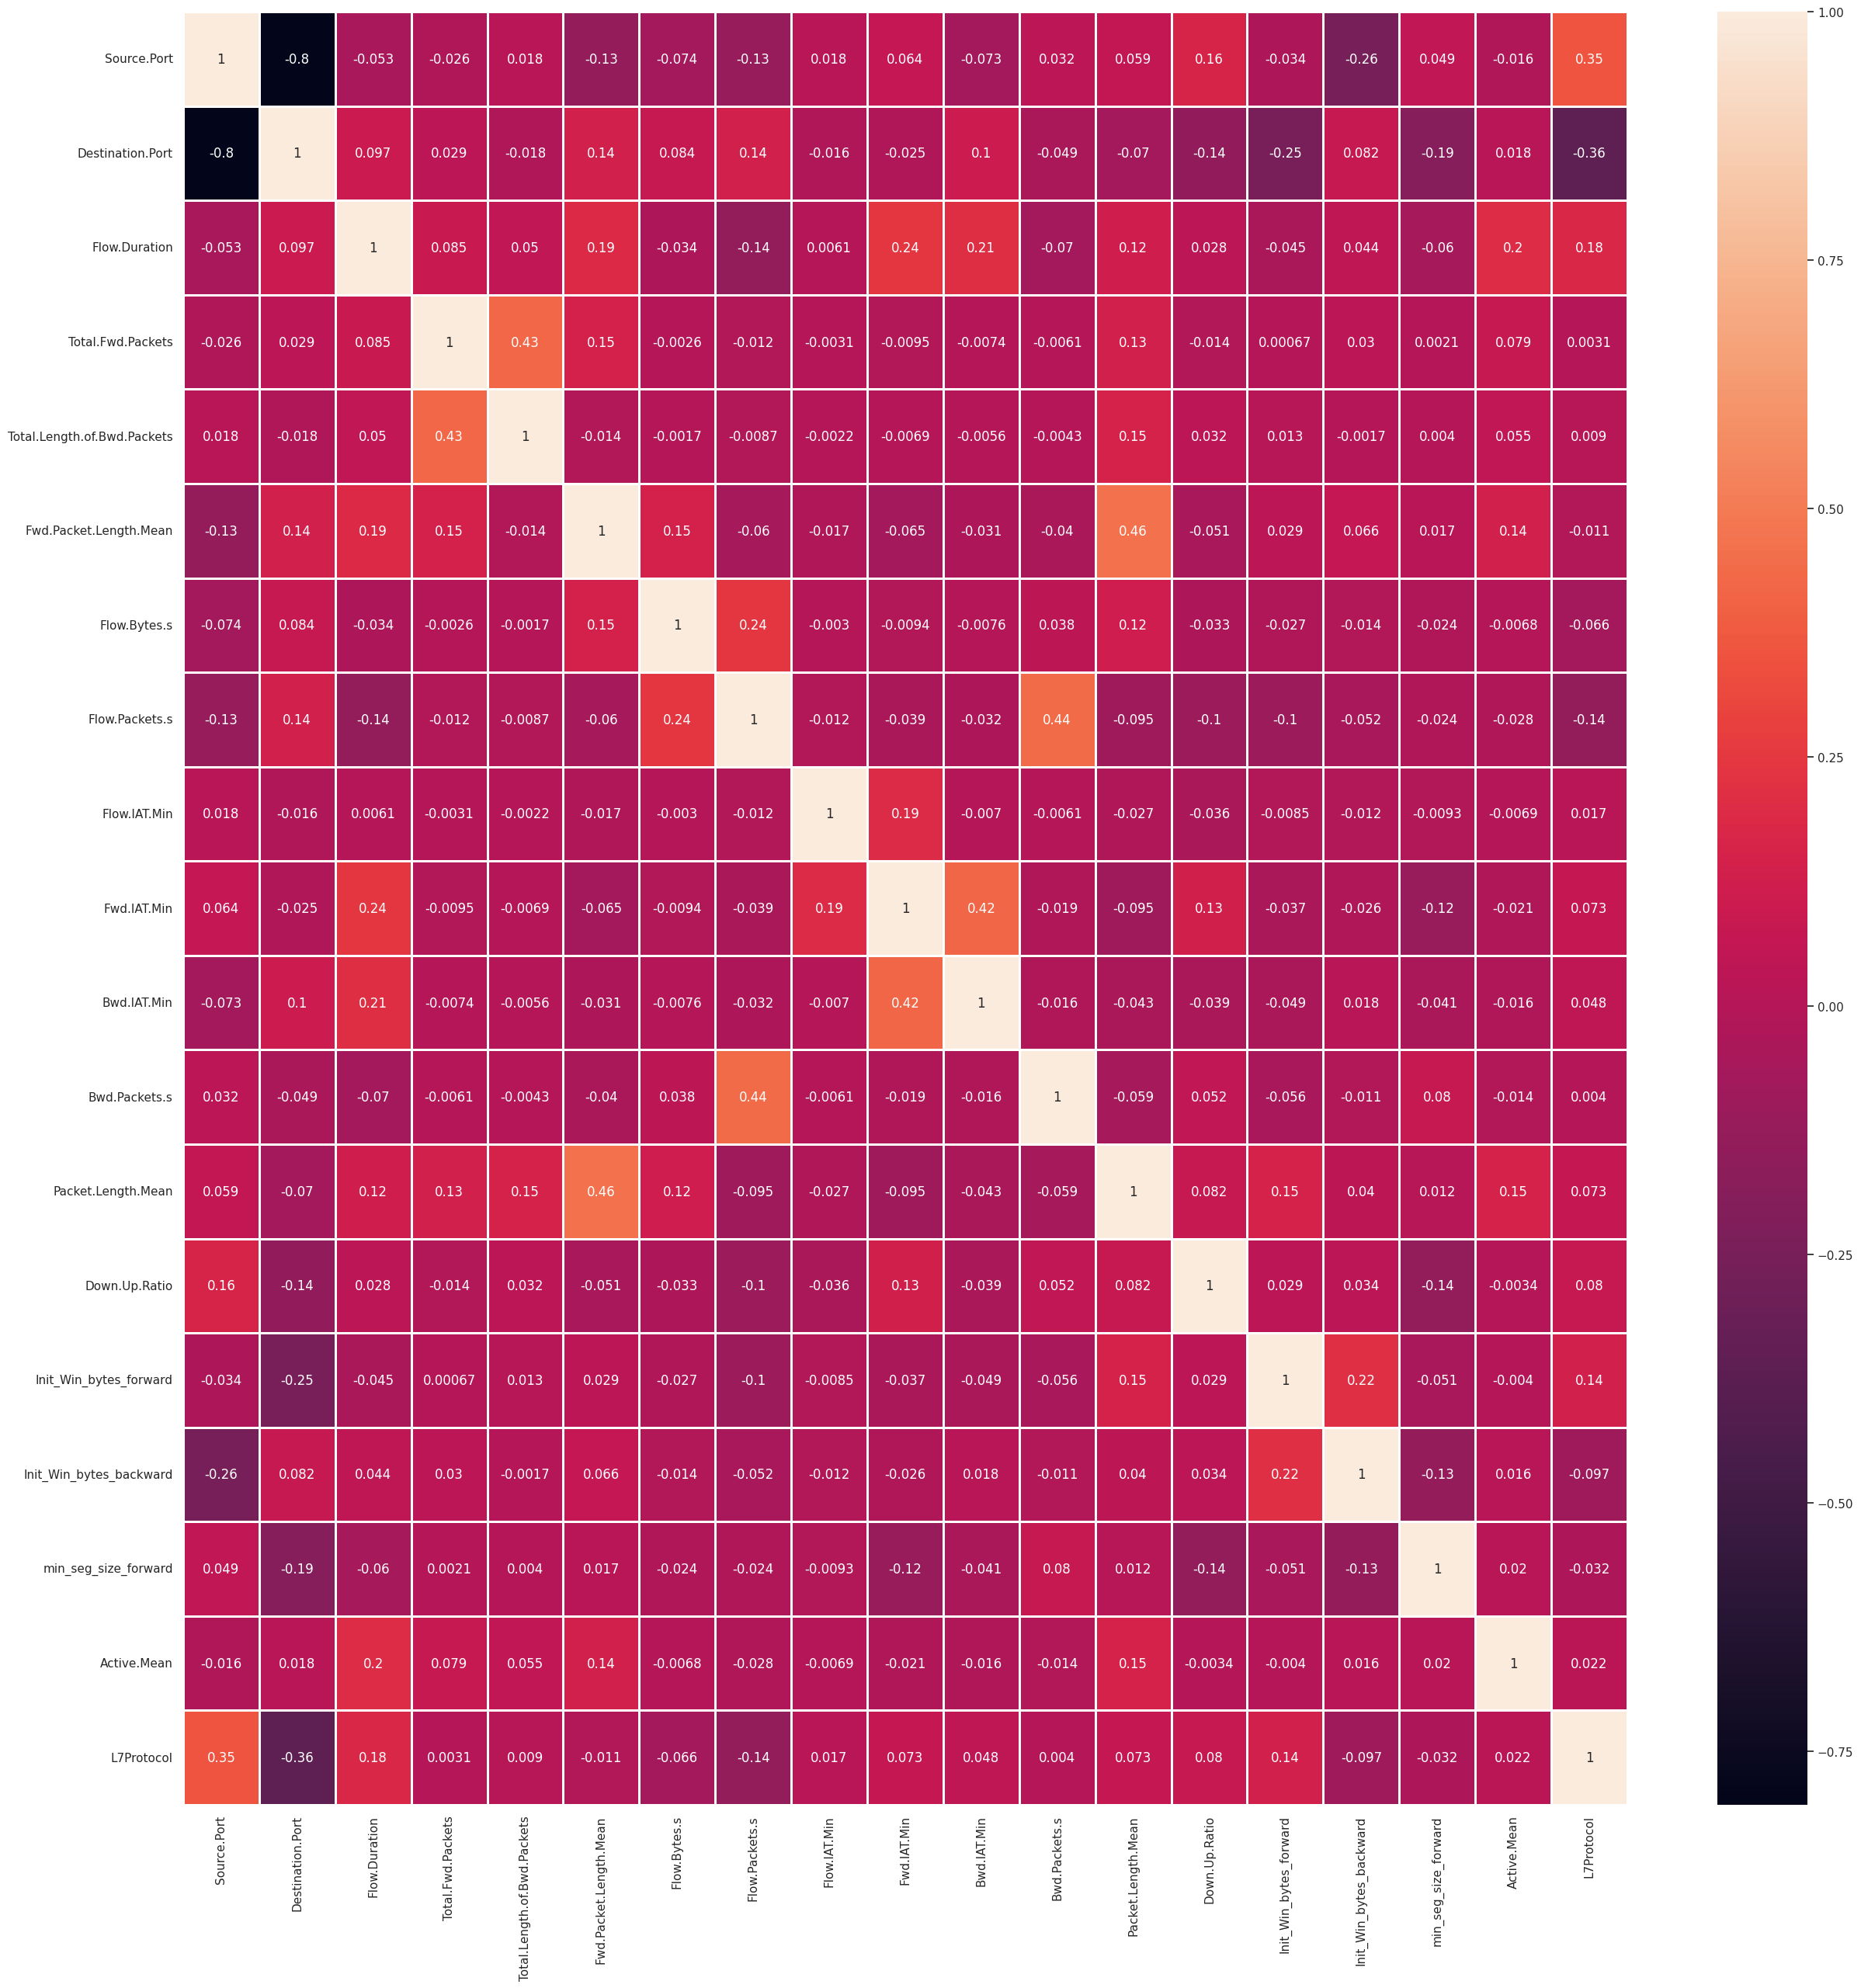

In [30]:
new_df = df[['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName'
       ]]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)